In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# CIFAR-10のインポート

In [2]:
# CIFAR-10のデータセットのインポート
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


学習データは5万枚分、32×32サイズの3チャネル

In [4]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

- `0` : airplane(飛行機)
- `1` : automobile（自動車）
- `2` : bird（鳥）
- `3` : cat（猫）
- `4` : deer（鹿）
- `5` : dog（犬）
- `6` : frog（蛙）
- `7` : horse（馬）
- `8` : ship（船）
- `9` : truck（トラック

In [7]:
for i, x in enumerate(X_train):
    print(i)
    print(x.shape)
    break

0
(32, 32, 3)


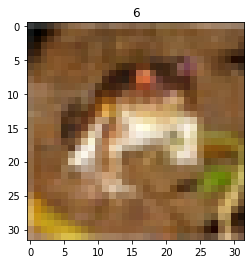

In [5]:
plt.figure()
plt.title(Y_train[0][0])
plt.imshow(X_train[0])
plt.show()

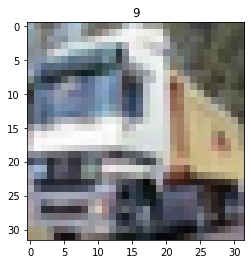

In [6]:
plt.figure()
plt.title(Y_train[1][0])
plt.imshow(X_train[1])
plt.show()

# 前処理

## 正規化

In [7]:
X_train.max()

255

In [8]:
# 特徴量の正規化(0~1の値に変換する)
X_train = X_train / 255.
X_test = X_test / 255.

## クラスラベルを1-hotベクトル化

In [9]:
pd.DataFrame(Y_train)[0].value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
Name: 0, dtype: int64

In [10]:
from keras.utils import to_categorical

# 10次元の1-hotベクトルを作成
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [11]:
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


# モデル学習

## モデル構築

In [12]:
IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS = X_train.shape[1:]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


カーネルサイズ = (3, 3)  # フィルタのサイズ
フィルターの種類数 = 32
ゼロパディング = "valid"  # zero-padding

model = Sequential([
    Conv2D(フィルターの種類数, カーネルサイズ, strides=(1, 1), padding=ゼロパディング, activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS)),
    MaxPooling2D(pool_size=(2, 2), strides=None, padding=ゼロパディング),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## モデル学習

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
epochs = 5
history = model.fit(X_train, Y_train, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5476 - accuracy: 0.4350 - val_loss: 1.2799 - val_accuracy: 0.5396
Epoch 2/5
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1770 - accuracy: 0.5825 - val_loss: 1.0669 - val_accuracy: 0.6265
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0218 - accuracy: 0.6413 - val_loss: 1.0067 - val_accuracy: 0.6465
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9310 - accuracy: 0.6738 - val_loss: 0.9345 - val_accuracy: 0.6765
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8510 - accuracy: 0.7030 - val_loss: 0.9464 - val_accuracy: 0.6718


## モデル予測

In [53]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

313/313 - 2s - loss: 0.9464 - accuracy: 0.6718


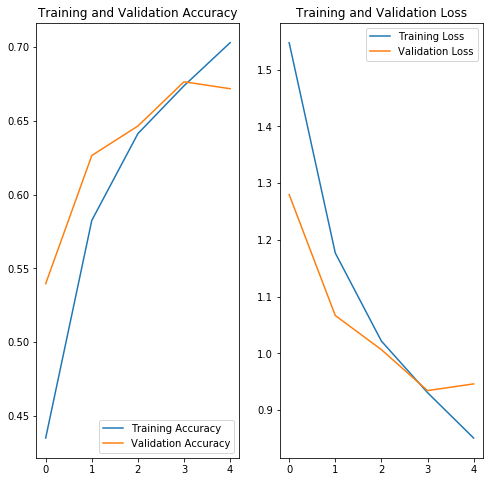

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# ベクトルを出力

In [56]:
from keras.models import Model

# 出力層から１つ前の中間層を出力
hidden_layer_model = Model(inputs=model.input, outputs=model.get_layer('dense').output)

In [64]:
image_vector = hidden_layer_model.predict(X_test)

In [ ]:
image_vector.shape

In [65]:
import urllib
import numpy as np
import cv2


def url_to_image(url):
        resp = urllib.request.urlopen(url)
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        
        return image

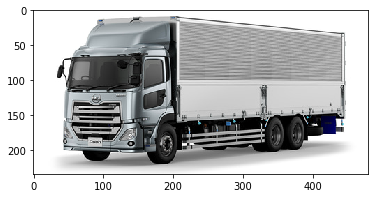

In [67]:
plt.imshow(url_to_image("https://car.watch.impress.co.jp/img/car/docs/1256/450/01_l.jpg"))

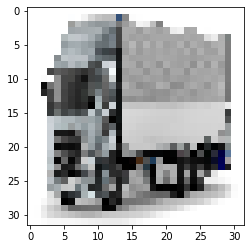

In [66]:
plt.imshow(cv2.resize(url_to_image("https://car.watch.impress.co.jp/img/car/docs/1256/450/01_l.jpg") , (32, 32)))

In [74]:
sample = cv2.resize(url_to_image("https://car.watch.impress.co.jp/img/car/docs/1256/450/01_l.jpg") , (32, 32))
sample = sample / 255
# 1データの32×32の3チャネルデータにする
sample = sample.reshape((1, 32, 32, 3))
vector = hidden_layer_model.predict(sample)

In [76]:
vector.shape

(1, 64)

In [83]:
np.random.rand(10).reshape((1, 10))

array([[0.08491112, 0.22618986, 0.38434396, 0.73917082, 0.85927447,
        0.27149776, 0.14362511, 0.91804462, 0.36349356, 0.56988881]])